In [1]:
import h5py
import numpy as np

file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_retrieval.h5'

# Open the file and inspect its structure
with h5py.File(file_path, 'r') as f:
    print("Datasets and groups in the file:")
    def print_structure(name, obj):
        print(name)
    f.visititems(print_structure)


Datasets and groups in the file:
Bibliography
Bibliography/bibtex
Bibliography/short_form
ModelParameters
ModelParameters/Chemistry
ModelParameters/Chemistry/CH4
ModelParameters/Chemistry/CH4/gas_type
ModelParameters/Chemistry/CH4/mix_ratio
ModelParameters/Chemistry/CH4/molecule_name
ModelParameters/Chemistry/CO
ModelParameters/Chemistry/CO/gas_type
ModelParameters/Chemistry/CO/mix_ratio
ModelParameters/Chemistry/CO/molecule_name
ModelParameters/Chemistry/CO2
ModelParameters/Chemistry/CO2/gas_type
ModelParameters/Chemistry/CO2/mix_ratio
ModelParameters/Chemistry/CO2/molecule_name
ModelParameters/Chemistry/H2O
ModelParameters/Chemistry/H2O/gas_type
ModelParameters/Chemistry/H2O/mix_ratio
ModelParameters/Chemistry/H2O/molecule_name
ModelParameters/Chemistry/active_gases
ModelParameters/Chemistry/chemistry_type
ModelParameters/Chemistry/fill_gases
ModelParameters/Chemistry/inactive_gases
ModelParameters/Chemistry/ratio
ModelParameters/Contributions
ModelParameters/Contributions/Absorption

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Path to the HDF5 file
file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_retrieval.h5'

# Open the HDF5 file and extract data
with h5py.File(file_path, 'r') as f:
    # Extract wavelength and spectrum
    wavelength = f['Output/Spectra/native_wlgrid'][:]  # Wavelength grid
    spectrum = f['Output/Spectra/native_spectrum'][:]  # Native spectrum

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(wavelength, spectrum, s=2, label='Transmission Retrieval Spectrum')
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Transmission Retrieval Spectrum')
plt.legend()
plt.grid(True)
plt.savefig('/ca24/AstroCode-Collective/HD_209458_b_assignment3_taskC_spectrum.png')  # Save the plot
plt.show()


KeyError: 'Unable to synchronously open object (component not found)'

In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Paths to the HDF5 file and original data
retrieval_file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission_retrieval.h5'
original_data_file_path = '/ca24/AstroCode-Collective/src/daneel/detection/Simple_Transmission.h5'

# Load the retrieval spectrum
with h5py.File(retrieval_file_path, 'r') as f:
    wavelength_retrieval = f['Output/Spectra/native_wlgrid'][:]  # Wavelength grid
    spectrum_retrieval = f['Output/Spectra/native_spectrum'][:]  # Native spectrum
    # Mock error bars for retrieval (replace with actual errors if available)
#    errors_retrieval = np.full_like(wavelength_retrieval, 0.0001)

with h5py.File(original_data_file_path, 'r') as f:
    wavelength_original = f['Output/Spectra/native_wlgrid'][:]  # Replace with actual dataset name
    spectrum_original = f['Output/Spectra/native_spectrum'][:]
#    errors_original = f['Errors'][:]  # If errors are stored

# Plot the data
plt.figure(figsize=(10, 7))

# Plot the retrieval spectrum with error bars
plt.scatter(wavelength_retrieval, spectrum_retrieval,
             label='Retrieval Spectrum', color='blue', s=1)
#plt.errorbar(wavelength_retrieval, spectrum_retrieval, yerr=errors_retrieval, fmt='o', markersize=2, capsize=3,
#             label='Retrieval Spectrum', color='blue', ecolor='blue', alpha=0.7)

# Plot the original spectrum with error bars
plt.scatter(wavelength_original, spectrum_original,
             label='Original Spectrum', color='orange', s=1)
#plt.errorbar(wavelength_original, spectrum_original, yerr=errors_original, fmt='o', markersize=2, capsize=3,
#             label='Original Spectrum', color='orange', ecolor='orange', alpha=0.7)

# Customize plot
plt.xlabel('Wavelength (microns)')
plt.ylabel('(Rp/Rs)^2')
plt.title('Comparison of Original and Retrieval Spectra')
plt.legend()
plt.grid(True)

# Save the plot
#output_path = '/ca24/AstroCode-Collective/assignment3_taskC.png'
#plt.savefig(output_path)
plt.show()
#print(f"Plot saved to {output_path}")

KeyError: 'Unable to synchronously open object (component not found)'

In [4]:
import h5py


with h5py.File(file_path, 'r') as f:
    # Extract Planet Radius
    planet_radius_mean = f['Output/Solutions/solution0/fit_params/planet_radius/mean'][()]
    planet_radius_error_p = f['Output/Solutions/solution0/fit_params/planet_radius/sigma_p'][()]
    planet_radius_error_m = f['Output/Solutions/solution0/fit_params/planet_radius/sigma_m'][()]

    # Extract Temperature
    temperature_mean = f['Output/Solutions/solution0/fit_params/T/mean'][()]
    temperature_error_p = f['Output/Solutions/solution0/fit_params/T/sigma_p'][()]
    temperature_error_m = f['Output/Solutions/solution0/fit_params/T/sigma_m'][()]

    # Extract H2O Abundance
    log_h2o_mean = f['Output/Solutions/solution0/fit_params/log_H2O/mean'][()]
    log_h2o_error_p = f['Output/Solutions/solution0/fit_params/log_H2O/sigma_p'][()]
    log_h2o_error_m = f['Output/Solutions/solution0/fit_params/log_H2O/sigma_m'][()]



    # Convert log(H2O) to linear scale for abundance
    h2o_mean = 10 ** log_h2o_mean
    h2o_error_p = h2o_mean * (10 ** log_h2o_error_p - 1)
    h2o_error_m = h2o_mean * (1 - 10 ** log_h2o_error_m)

    # Print results
    print(f"Planet Radius: {planet_radius_mean:.4f} +{planet_radius_error_p:.4f} -{planet_radius_error_m:.4f} Rj")
    print(f"Temperature: {temperature_mean:.2f} +{temperature_error_p:.2f} -{temperature_error_m:.2f} K")
    print(f"H2O Abundance: {h2o_mean:.2e} +{h2o_error_p:.2e} -{h2o_error_m:.2e}")




Planet Radius: 1.3907 +0.0001 -0.0001 Rj
Temperature: 1200.01 +0.01 -0.01 K
H2O Abundance: 1.07e-04 +2.16e-06 --2.61e-06


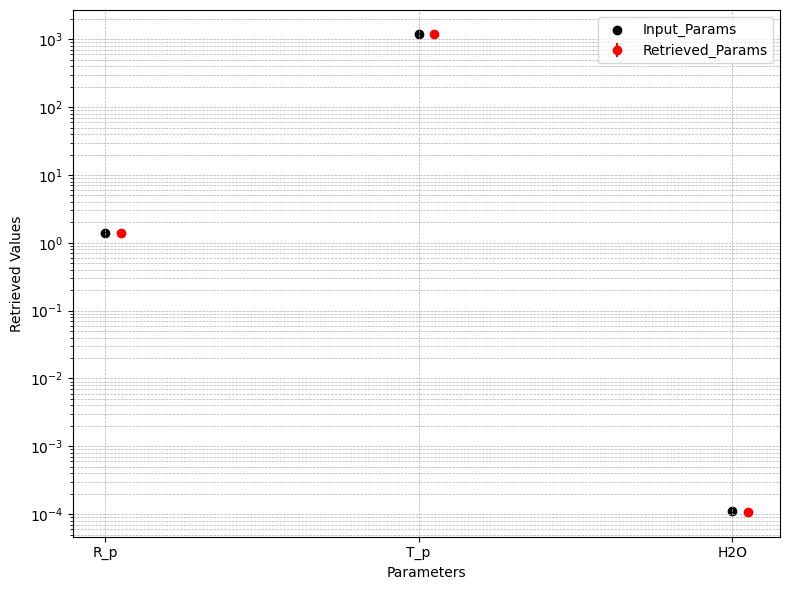

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
parameters = ['R_p', 'T_p', 'H2O']

# TauREx values and errors
Input_Params = [1.39, 1200, 1.1185e-04]
#Input_errors = [[0.1, 0.01, 2, 1, 3, 0.00002],  # Negative errors
#                 [0.2, 0.02, 1.5, 2, 2, 0.00003]]  # Positive errors

# ExoGAN values and errors
Retrieved_Params = [1.3907, 1200.01, 1.07e-04]
Retrieved_errors = [[0.0001, 0.01, 2.16e-06],  # Negative errors
                 [0.0001, 0.01, 2.16e-06]]  # Positive errors


# X-axis positions for each parameter
x_positions = np.arange(len(parameters))

# Create the plot
plt.figure(figsize=(8, 6))

# Plot TauREx data with error bars
plt.scatter(x_positions, Input_Params, color='black', label='Input_Params')
#plt.scatter(x_positions, Retrieved_Params, color='red', label='Retrieved_Params')


plt.errorbar(x_positions+ 0.05, Retrieved_Params, yerr=Retrieved_errors, fmt='o', color='red', label='Retrieved_Params')

# Customize x-axis
plt.xticks(x_positions, parameters)
plt.xlabel('Parameters')

# Logarithmic y-axis
plt.yscale('log')
plt.ylabel('Retrieved Values')

# Add legend
plt.legend()

output_path = '/ca24/AstroCode-Collective/assignment3_taskC.png'
plt.savefig(output_path)
# Show grid and plot
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



